In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1zmQcct0Jd1IJ3jgXXQEVyzDXoWBYzU-TN39Svzff1no

Downloading...
From (original): https://drive.google.com/uc?id=1zmQcct0Jd1IJ3jgXXQEVyzDXoWBYzU-TN39Svzff1no
From (redirected): https://docs.google.com/spreadsheets/d/1zmQcct0Jd1IJ3jgXXQEVyzDXoWBYzU-TN39Svzff1no/export?format=xlsx
To: /content/ola_driver_scaler.xlsx
1.02MB [00:00, 20.1MB/s]


In [ ]:
df = pd.read_excel('ola_driver_scaler.xlsx')

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,2019-03-11 00:00:00,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06 00:00:00,NaN,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06 00:00:00,NaN,2,2,0,1


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,datetime64[ns]
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


In [ ]:
# checking the number of unique drivers

df['Driver_ID'].nunique()

2381

In [ ]:
### dropping the unnamed id column
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
## creating the target variable -- "attrition flag" based on the drivers who have left OLA according to their Last working date
df['attrition_flag'] = np.where(df['LastWorkingDate'].isnull() == True, 0, 1)

In [ ]:
df['attrition_flag'].value_counts()

,count
attrition_flag,
0,17488
1,1616


**CHECKING THE DATA OF INDIVIDUAL DRIVERS TO UNDERSTAND THE PATTERN OF THE DATA**

In [ ]:
sample_one_driver = df[df['Driver_ID']==1]

In [ ]:
sample_one_driver.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,attrition_flag
0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,2019-03-11 00:00:00,1,1,0,2,1


In [ ]:
df['Driver_ID'].value_counts()

,count
Driver_ID,
2110,24
2617,24
1623,24
1642,24
1644,24
...,...
1614,1
445,1
2397,1


In [ ]:
sample_ten_driver = df[df['Driver_ID']==24]

In [ ]:
sample_ten_driver['Quarterly Rating'].value_counts()

,count
Quarterly Rating,
2,7
3,3


Conclusion: There are multiple rows for one driver and the data can be grouped bu taking just one row value out of all the rows and summing on the business value column

**CREATING NEW COLUMNS - INCREASE IN QUARTERLY RATING,INCREASE IN GRADE,INCREASE IN GRADE**

In [ ]:
# Sorting by 'id' and assuming 'Quarterly Rating' column has the increasing pattern
df = df.sort_values(['Driver_ID', 'Quarterly Rating'])

# Grouping by 'id' and checking if value increases
df['Quarterly_Rating_Increase_Flag'] = df.groupby('Driver_ID')['Quarterly Rating'].transform(lambda x: (x.diff() > 0).any())


In [ ]:
df['Quarterly_Rating_Increase_Flag'] = df['Quarterly_Rating_Increase_Flag'].astype(int)

In [ ]:
df['Quarterly_Rating_Increase_Flag'].value_counts()

,count
Quarterly_Rating_Increase_Flag,
1,14174
0,4930


In [ ]:
df = df.sort_values(['Driver_ID','Income'])

df['Income_Increase'] = df.groupby('Driver_ID')['Income'].transform(lambda x: (x.diff() > 0).any())

In [ ]:
df['Income_Increase'] = df['Income_Increase'].astype(int)

In [ ]:
df['Income_Increase'].value_counts()

,count
Income_Increase,
0,18114
1,990


In [ ]:
df.shape

(19104, 16)

In [ ]:
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


**AGGREGATION OF THE DATASET ON DRIVER ID**

In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your data)
# df = pd.read_csv('your_file.csv')

# Group by 'Driver_ID' and take the last value for all other columns
df_last = df.groupby('Driver_ID').last().reset_index()

# Sum the 'Income' for each 'Driver_ID'
business_value_sum = df.groupby('Driver_ID')['Total Business Value'].sum().reset_index()

# Merge the last value dataframe with the income sum
result = pd.merge(df_last, business_value_sum, on='Driver_ID', suffixes=('', '_total'))




In [ ]:
### change in grade

result['upgraded_designation'] = np.where(result['Joining Designation'] == result['Grade'], 0, 1)

In [ ]:
result.shape

(2381, 18)

In [ ]:
result.isnull().sum()

,0
Driver_ID,0
MMM-YY,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,765
Joining Designation,0


**FEATURE ENGINEERING TO UNDERSTAND THE RELATIONSHIP BETWEEN DATE TYPE VARIABLES**







In [ ]:
from datetime import datetime


result['Dateofjoining'] = pd.to_datetime(result['Dateofjoining'])
result['LastWorkingDate'] = pd.to_datetime(result['LastWorkingDate'])


<ipython-input-27-acc118fca2d6>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['Dateofjoining'] = pd.to_datetime(result['Dateofjoining'])


In [ ]:
result['MMM-YY'] = pd.to_datetime(result['MMM-YY'])

In [ ]:
result.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,attrition_flag,Quarterly_Rating_Increase_Flag,Income_Increase,Total Business Value_total,upgraded_designation
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,0,0,1715580,0
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,0,0
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1,1,0,0,350000,0
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,0,1,1,0,0,120360,0
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,0,2,0,1,0,1265000,0


In [ ]:
result['duration_of_service'] = result['LastWorkingDate'] - result['Dateofjoining']

In [ ]:
from datetime import datetime

result['duration_from_joining'] = pd.to_datetime(datetime.now().date()) - pd.to_datetime(result['Dateofjoining'])

In [ ]:
result['duration_from_joining'] = result['duration_from_joining'].dt.days
result['duration_of_service'] = result['duration_of_service'].dt.days

In [ ]:
result.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,attrition_flag,Quarterly_Rating_Increase_Flag,Income_Increase,Total Business Value_total,upgraded_designation,duration_of_service,duration_from_joining
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,0,0,1715580,0,77.0,2226
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,0,0,NaN,1543
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1,1,0,0,350000,0,142.0,1878
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,0,1,1,0,0,120360,0,57.0,2210
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,0,2,0,1,0,1265000,0,NaN,1641


In [ ]:
result['duration_since_reporting'] = (pd.to_datetime(datetime.now().date()) - pd.to_datetime(result['MMM-YY'])).dt.days

In [ ]:
result.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Total Business Value,Quarterly Rating,attrition_flag,Quarterly_Rating_Increase_Flag,Income_Increase,Total Business Value_total,upgraded_designation,duration_of_service,duration_from_joining,duration_since_reporting
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,...,0,2,1,0,0,1715580,0,77.0,2226,2159
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,...,0,1,0,0,0,0,0,NaN,1543,1518
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,...,0,1,1,0,0,350000,0,142.0,1878,1762
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,...,0,1,1,0,0,120360,0,57.0,2210,2159
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,...,0,2,0,1,0,1265000,0,NaN,1641,1518


In [ ]:
result.drop(['Total Business Value'],inplace=True,axis=1)

In [ ]:
result['month_of_iteration'] = pd.to_datetime(result['LastWorkingDate']).dt.month

In [ ]:
result['year_of_iteration'] = pd.to_datetime(result['LastWorkingDate']).dt.year

In [ ]:
result.drop(['Dateofjoining','MMM-YY','LastWorkingDate'],inplace=True,axis=1)

**STATISTICAL SUMMARY AFTER ADDING ALL THE DERIVED COLUMNS AND DROPPING THE SOURCE COLUMNS**

In [ ]:
result.select_dtypes(exclude='object').describe(percentiles=[0.8,0.85,0.9,0.95,0.98,0.99,1])


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,attrition_flag,Quarterly_Rating_Increase_Flag,Income_Increase,Total Business Value_total,upgraded_designation,duration_of_service,duration_from_joining,duration_since_reporting,month_of_iteration,year_of_iteration
count,2381.000000,2381.00000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,1616.000000,2381.000000,2381.000000,1616.000000,1616.000000
mean,1397.559009,33.51365,0.410332,1.00756,59336.159597,1.820244,2.097018,1.913062,0.449811,0.463671,0.018480,4.586742e+06,0.171357,357.573639,2179.698026,1812.798824,6.358911,2019.483292
std,806.161628,5.93320,0.491997,0.81629,28383.012146,0.841433,0.941702,1.089099,0.497579,0.498783,0.134706,9.127115e+06,0.376899,455.912274,586.994586,247.006943,3.477823,0.506031
min,1.000000,21.00000,0.000000,0.00000,10747.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.385530e+06,0.000000,0.000000,1491.000000,1518.000000,1.000000,2018.000000
50%,1400.000000,33.00000,0.000000,1.00000,55315.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,8.176800e+05,0.000000,176.000000,2017.000000,1793.000000,6.000000,2019.000000
80%,2233.000000,38.00000,1.000000,2.00000,81561.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,5.971490e+06,0.000000,491.000000,2450.000000,2098.000000,10.000000,2020.000000
85%,2377.000000,40.00000,1.000000,2.00000,89013.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,9.411200e+06,1.000000,638.500000,2616.000000,2159.000000,11.000000,2020.000000
90%,2509.000000,42.00000,1.000000,2.00000,99415.000000,3.000000,3.000000,4.000000,1.000000,1.000000,0.000000,1.497077e+07,1.000000,953.000000,3188.000000,2159.000000,11.000000,2020.000000
95%,2648.000000,44.00000,1.000000,2.00000,113807.000000,3.000000,4.000000,4.000000,1.000000,1.000000,0.000000,2.347103e+07,1.000000,1459.250000,3462.000000,2187.000000,12.000000,2020.000000
98%,2730.400000,47.00000,1.000000,2.00000,131239.600000,3.000000,4.000000,4.000000,1.000000,1.000000,0.000000,3.478996e+07,1.000000,1889.800000,3872.600000,2218.000000,12.000000,2020.000000


**CONCLUSION FROM THE STATISTICAL SUMMARY:-**
Most of the columns are ordinal and range bound except - age, income, total business value, duration of service, current tenure



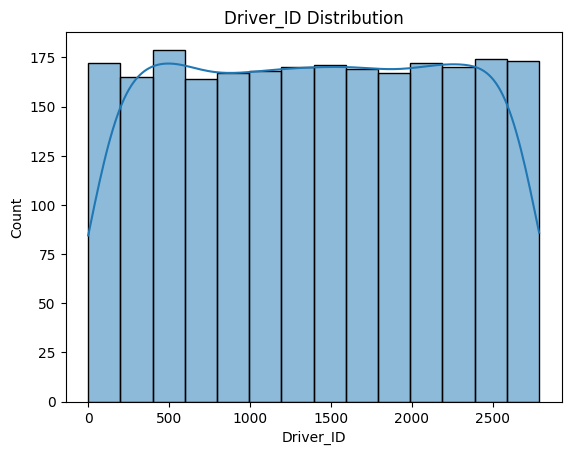

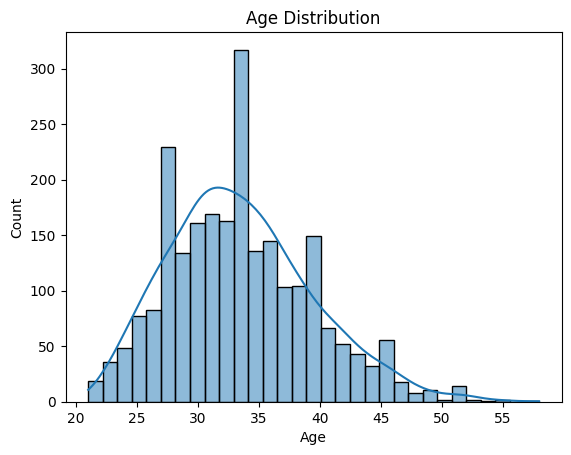

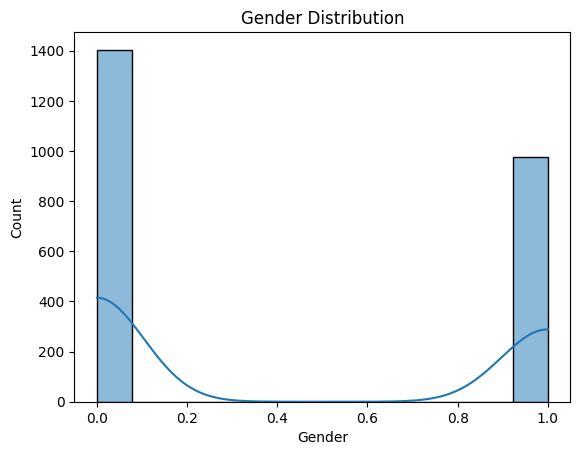

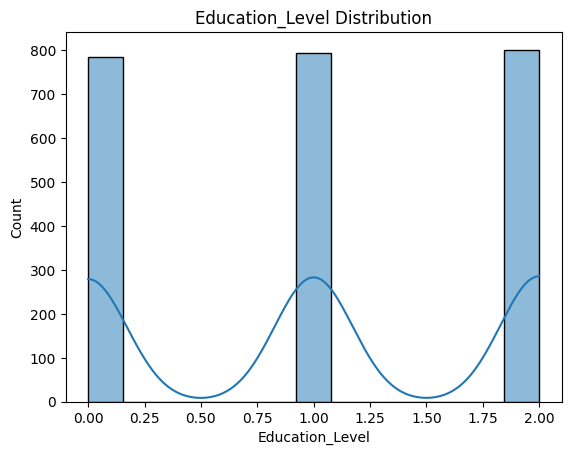

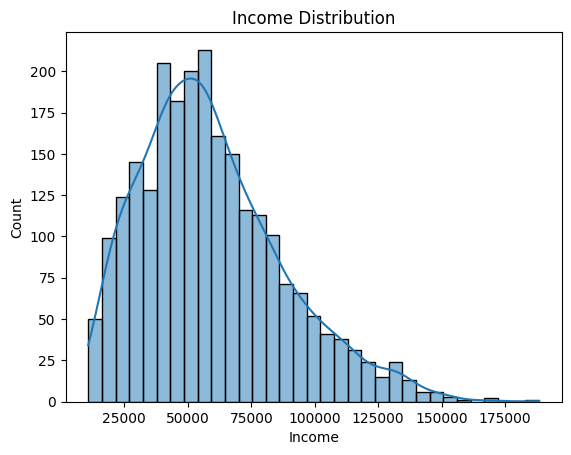

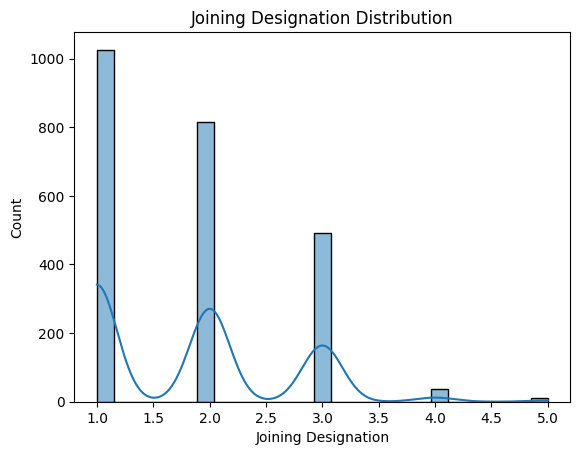

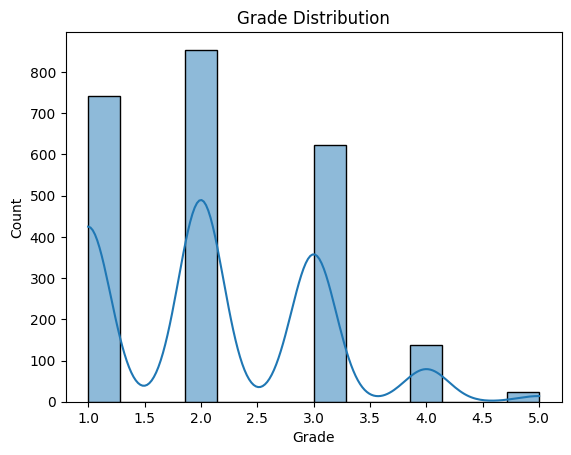

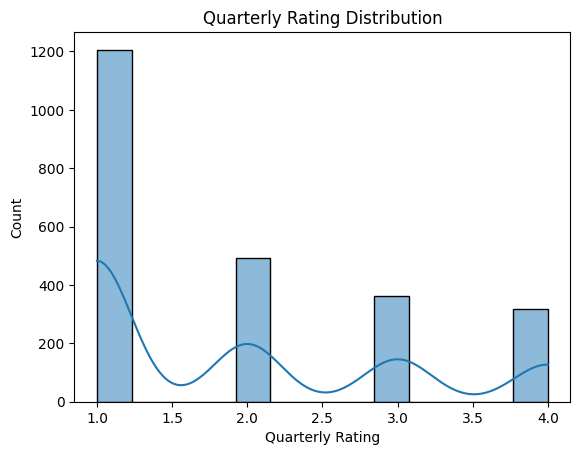

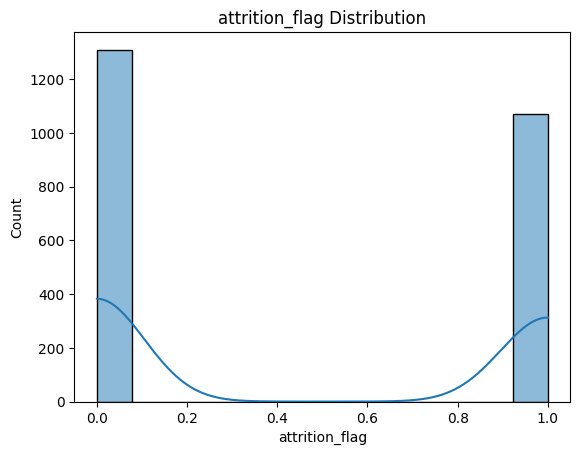

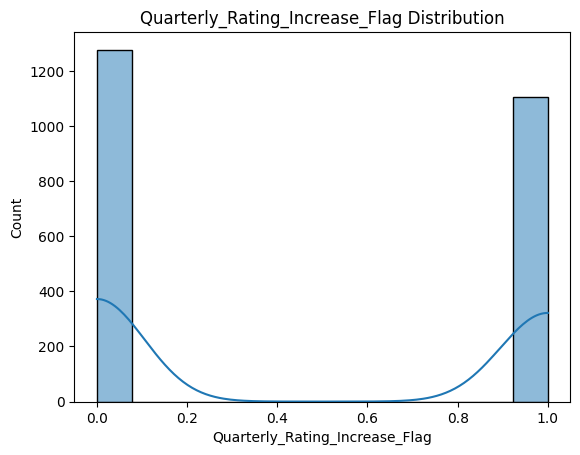

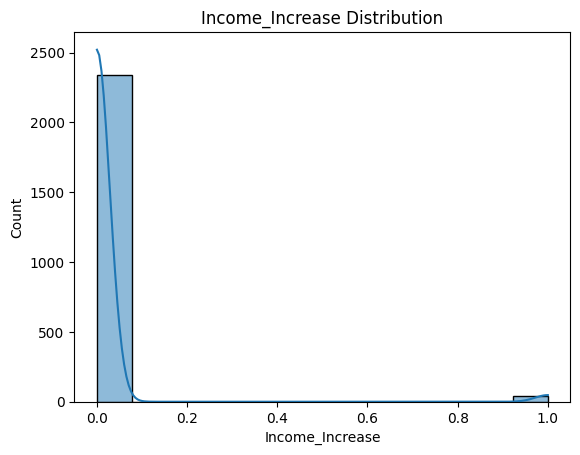

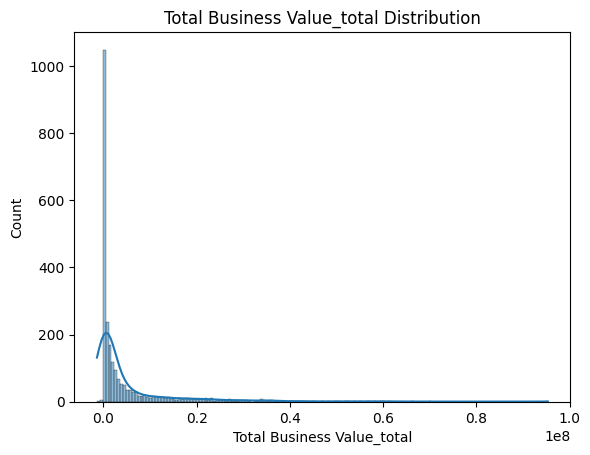

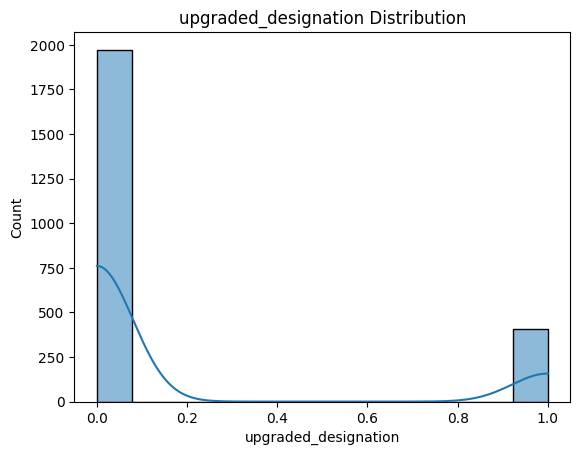

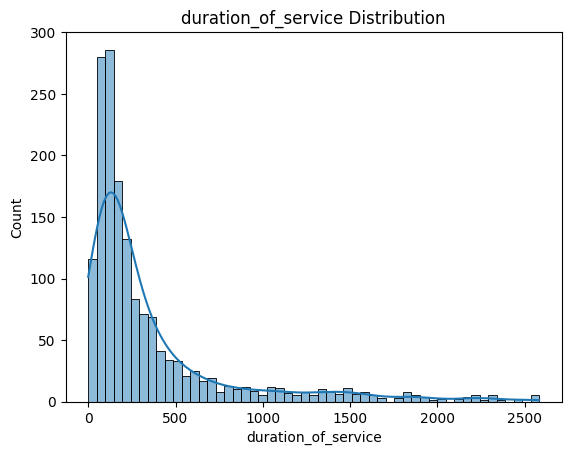

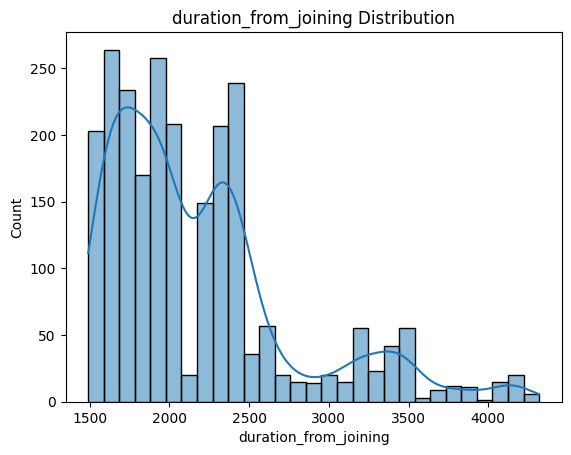

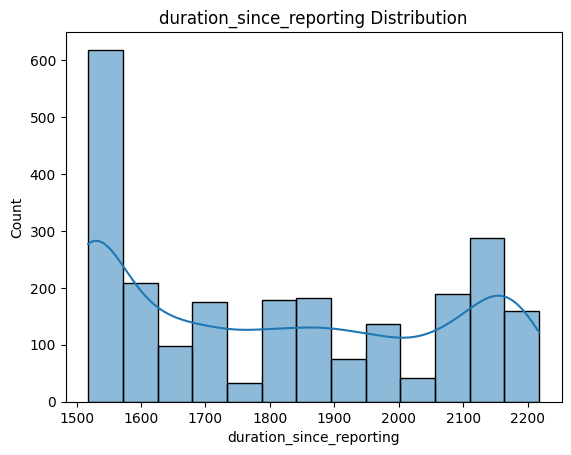

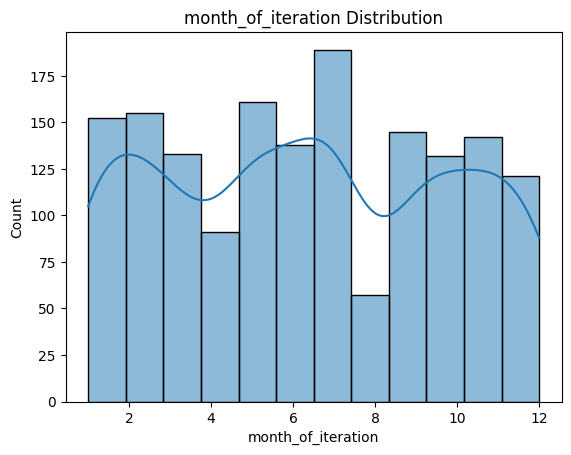

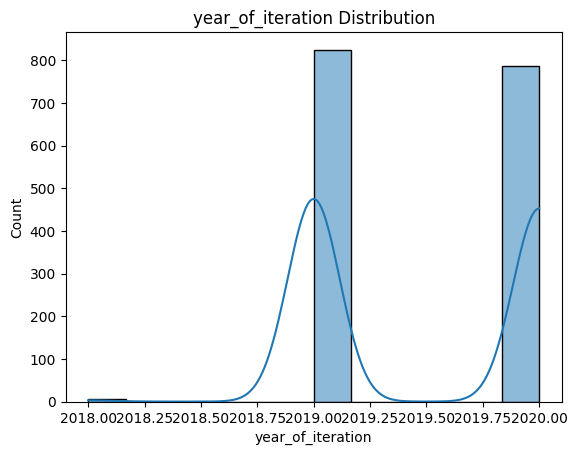

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in result.select_dtypes(exclude='object').columns:
    sns.histplot(result[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

Conclusion from histogram:

1. Following columns are nearly normally distributed with some of them skewed because of the presence of outliers:
Age
Income - right skewed
Total Business Value - right skewed and long tail, few drivers are acting as outlier with considerably higher business value
Duration of service -right skewed - few drivers are acting as outlier with considerably higher duration of service

2. Rest of the columns are range bound and ordinal in nature




In [ ]:
result.dtypes

,0
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Joining Designation,int64
Grade,int64
Quarterly Rating,int64
attrition_flag,int64


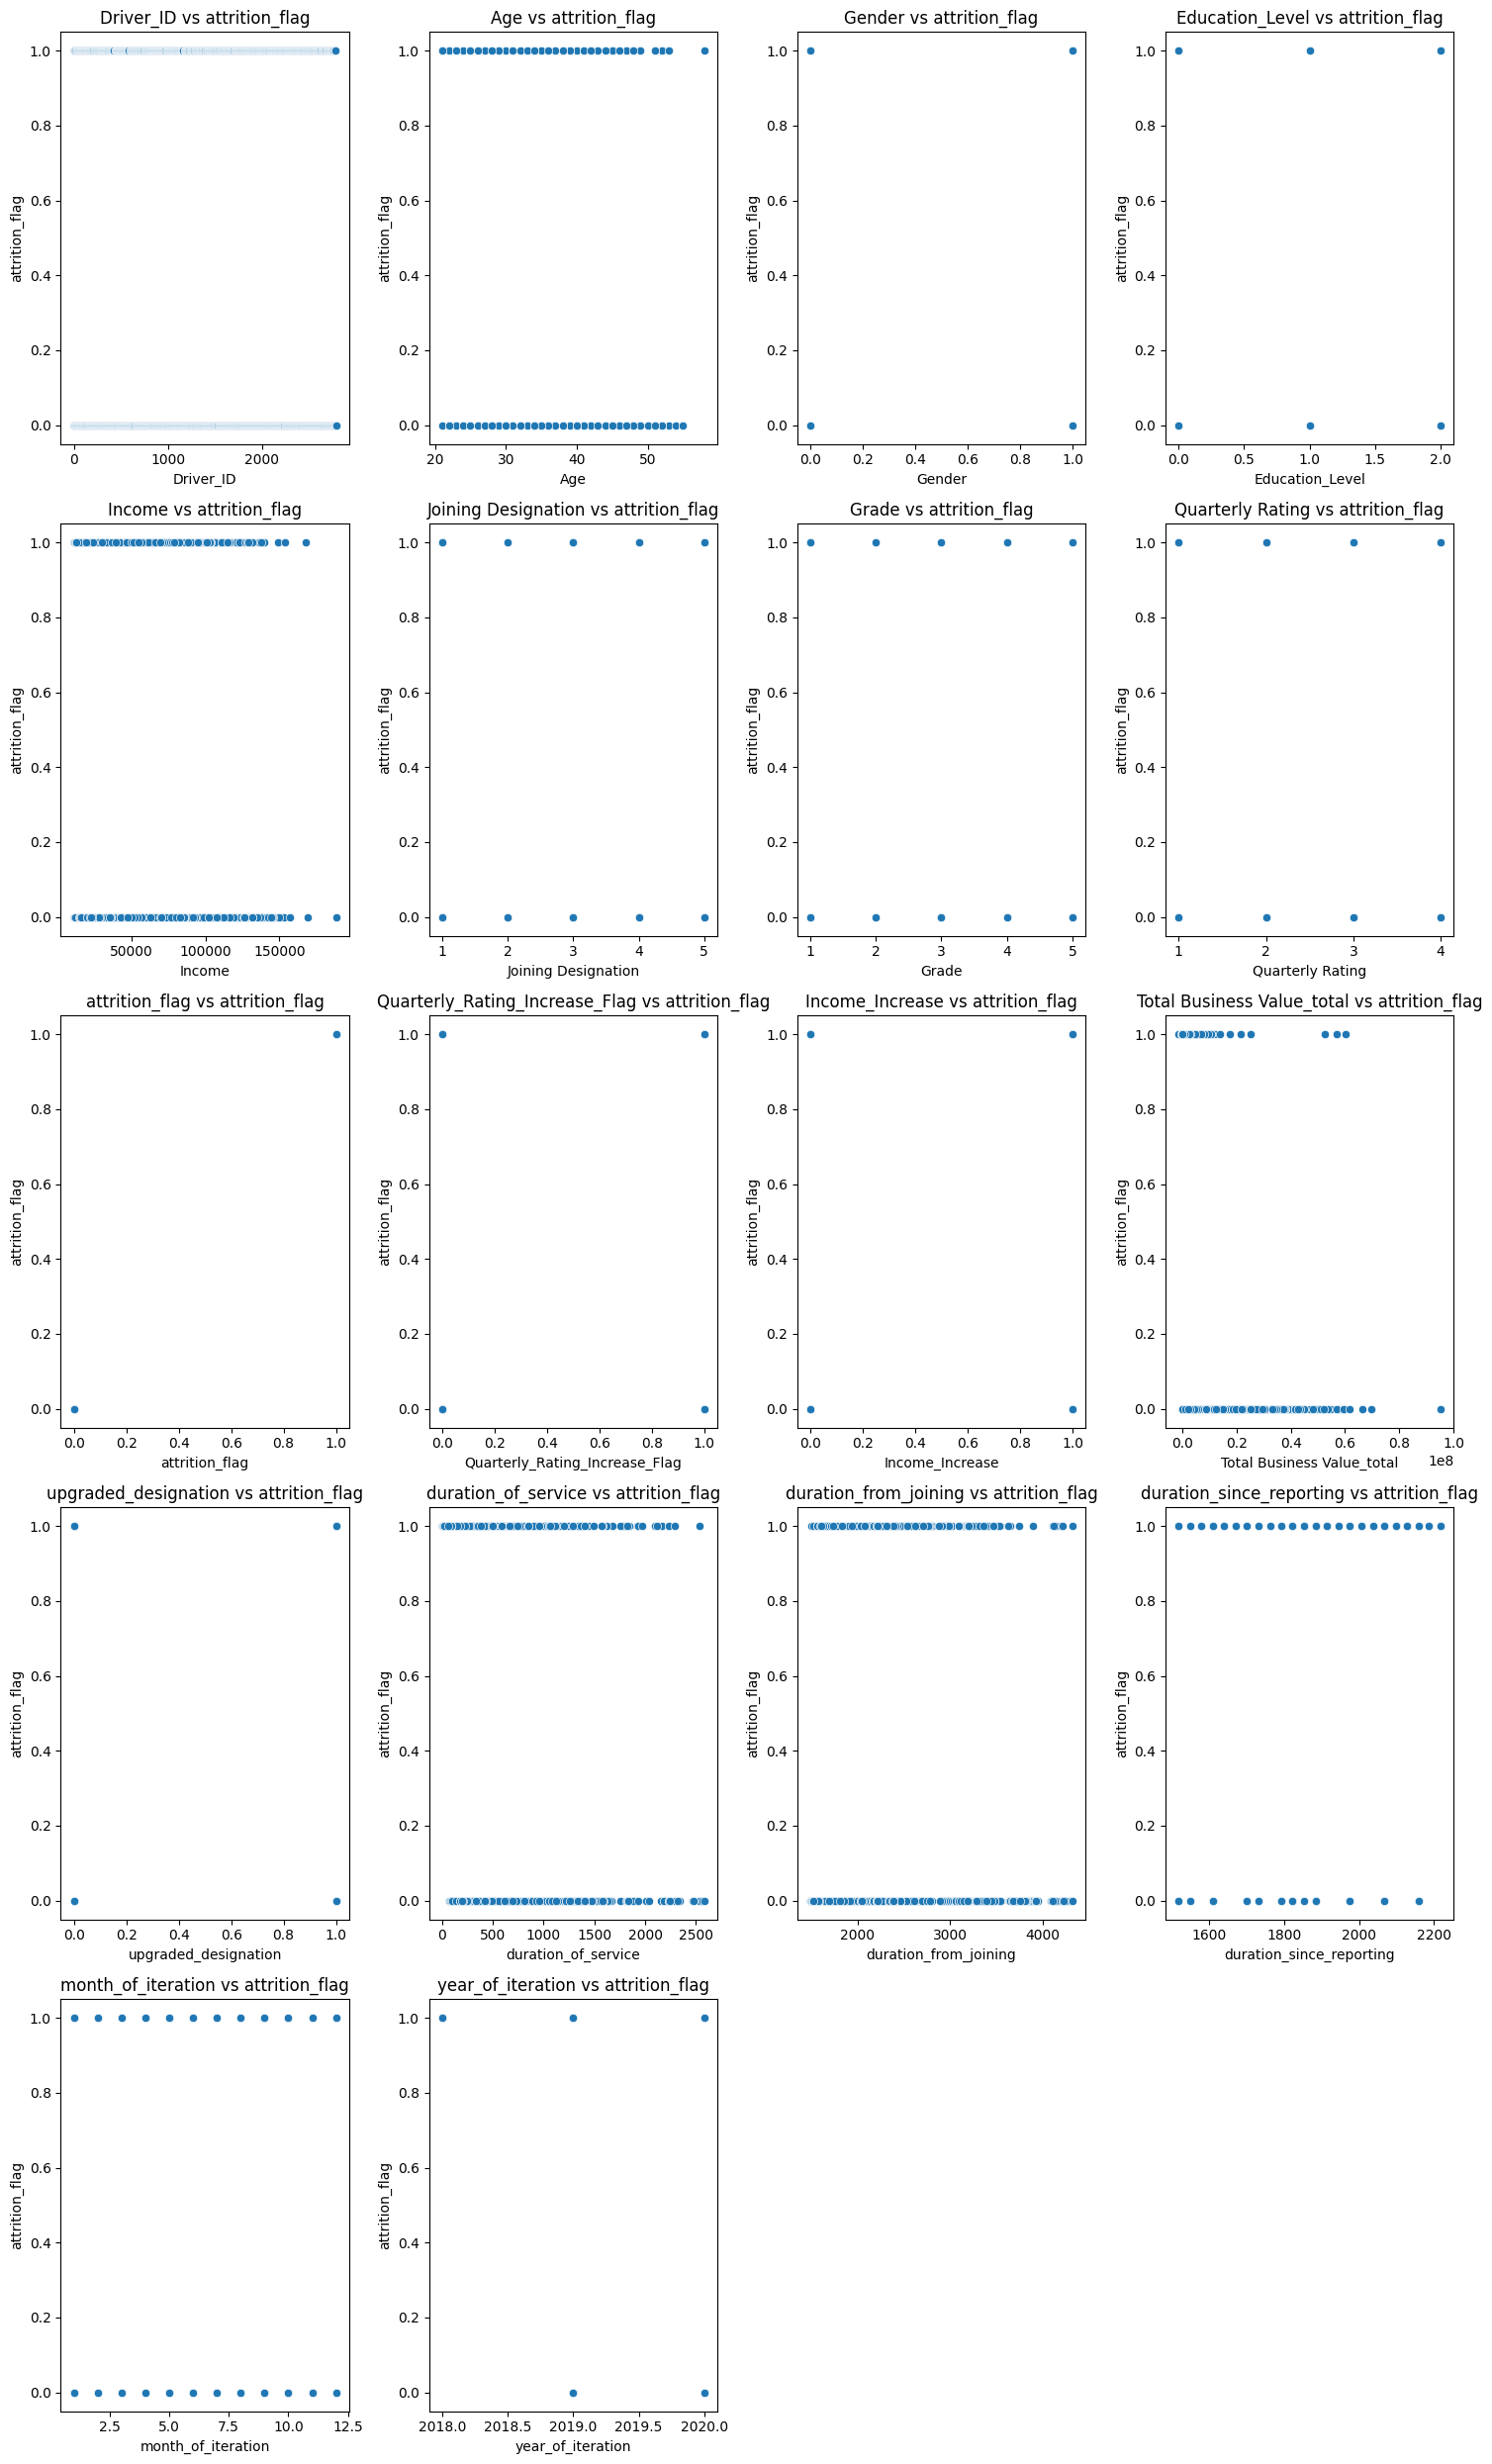

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the total number of numeric columns
total_number_num_columns = len(result.select_dtypes(exclude='object').columns)

# Define the number of columns per row
columns_per_row = 4

# Calculate the number of rows required
rows = (total_number_num_columns + columns_per_row - 1) // columns_per_row

# Create subplots with the required number of rows and columns
fig, axes = plt.subplots(nrows=rows, ncols=columns_per_row, figsize=(15, 5 * rows))

# Flatten the axes array so that we can iterate over it in a single loop
axes = axes.flatten()

# Get numeric columns from the dataframe
numeric_cols = result.select_dtypes(exclude='object').columns

# Loop through each column and plot on the corresponding axis
for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=result, x=col, y='attrition_flag', ax=axes[i])
    axes[i].set_title(f'{col} vs attrition_flag')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('attrition_flag')

# Remove any extra unused subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Summary from scatterplot - TOTAL BUSINESS VALUE is an important feature and has different spectrum of values for the drivers who have left OLA and v/s who have not

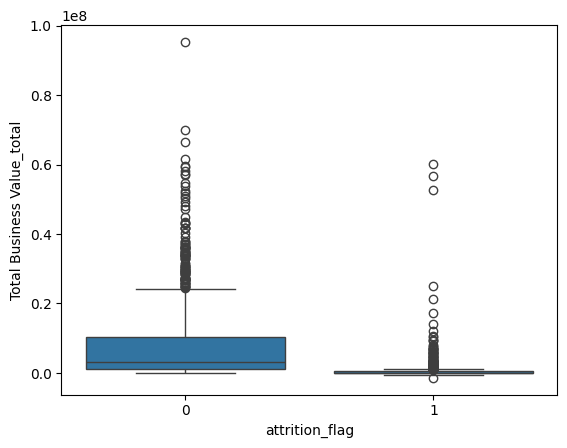

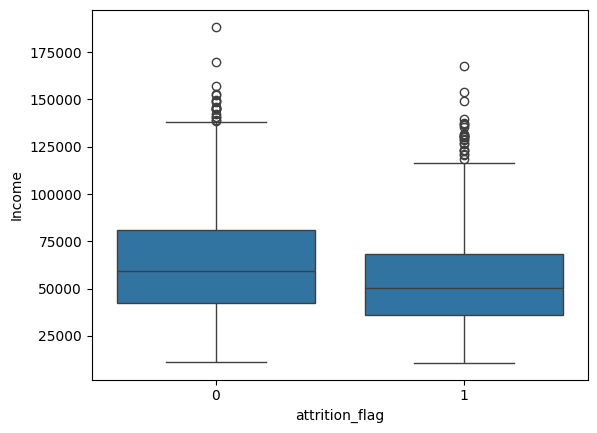

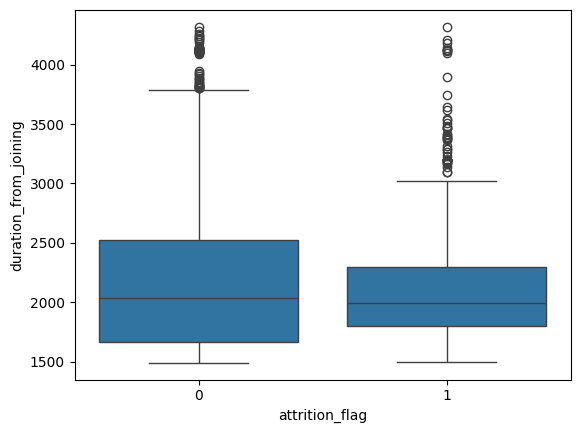

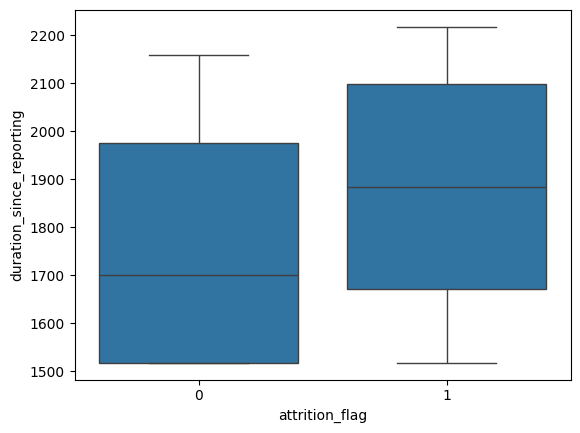

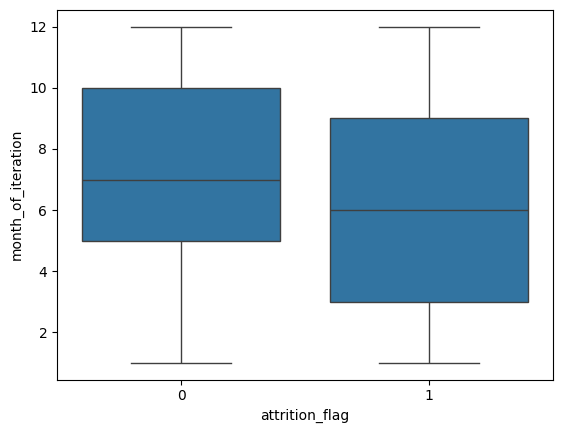

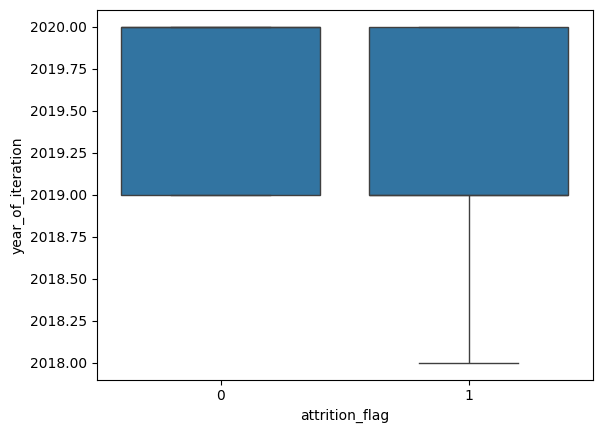

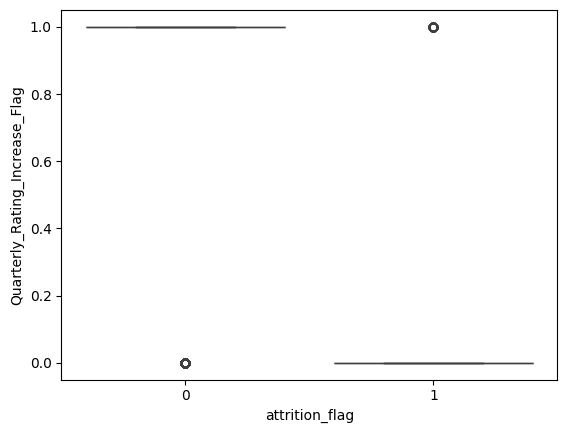

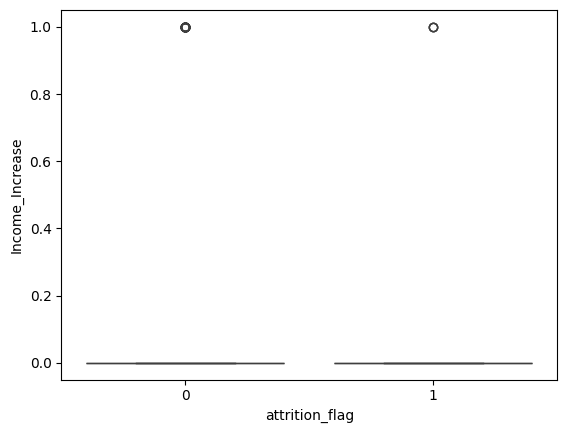

In [ ]:
# duration_of_service	float64
# duration_from_joining	int64
# duration_since_reporting	int64

for m_col in ['attrition_flag']:
  for num_col in ['Total Business Value_total','Income','duration_from_joining','duration_since_reporting','month_of_iteration','year_of_iteration','Quarterly_Rating_Increase_Flag','Income_Increase']:
    sns.boxplot(x=m_col, y=num_col, data=result)
    plt.show()

**Summary of BoxPlot :**

Total business value is directly related with the chances of attrition, drivers with lower business value tend to leave OLA - we might need to check the details of lower business value - cancellations, refund or car EMI adjustments,howeever there are a lot of exceptions to this(outliers), many drivers with higher business value have attritioned, we might need to segment the drivers based on high and low business value within the attrition group to understand the factors responsible for attrition in the high business value segment

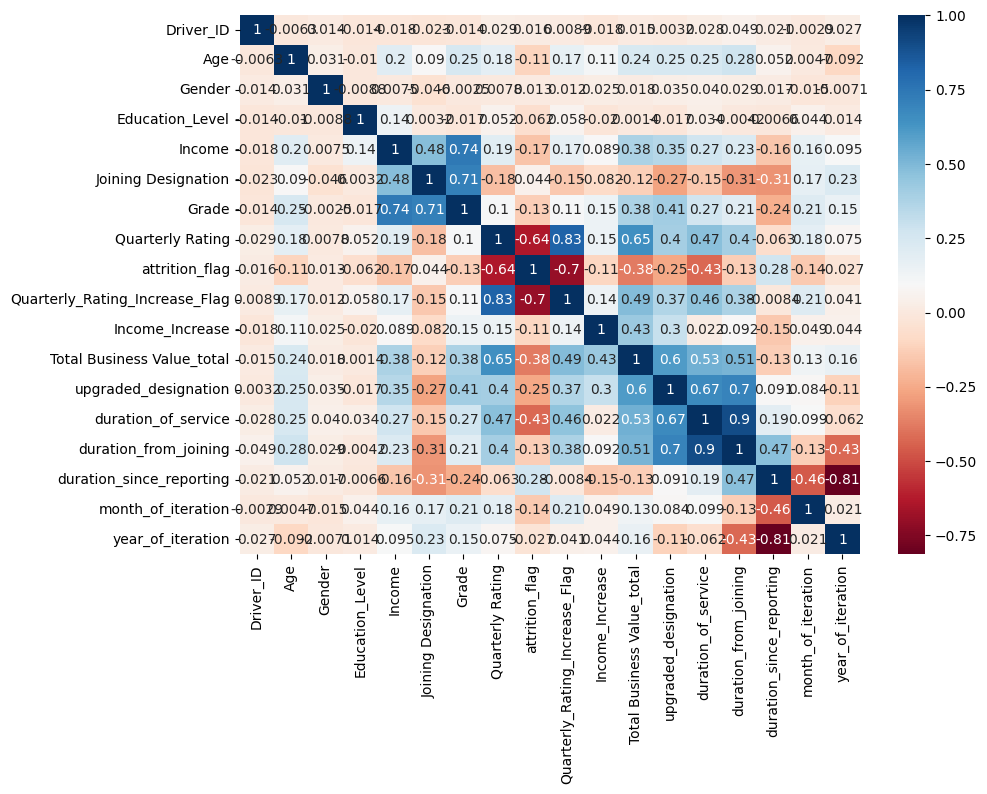

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(result.select_dtypes(exclude='object').corr(), annot=True,cmap='RdBu')
plt.show()

**Summary from Correlation:**

1. There is considerable positive correlation between the income and the
grade of the employee as per the real world context

2. We also have correlation of 0.71 between joining designation and current grade, so we can determine that drivers who have been upgraded from their joining designation to the upper grades or have not been upgraded has any impact on the attrition or not

3. There is high correlation between duration of service and probability of attrition



In [ ]:
result.columns.tolist()

['Driver_ID',
 'Age',
 'Gender',
 'City',
 'Education_Level',
 'Income',
 'Joining Designation',
 'Grade',
 'Quarterly Rating',
 'attrition_flag',
 'Quarterly_Rating_Increase_Flag',
 'Income_Increase',
 'Total Business Value_total',
 'upgraded_designation',
 'duration_of_service',
 'duration_from_joining',
 'duration_since_reporting',
 'month_of_iteration',
 'year_of_iteration']

In [ ]:
result1 = result.drop(['Driver_ID','Joining Designation','Grade','duration_since_reporting','year_of_iteration'],axis=1,inplace=False)

In [ ]:
result2 = result1.drop(['Income','Quarterly Rating'],axis=1,inplace=False)

In [ ]:
result2.shape

(2381, 12)

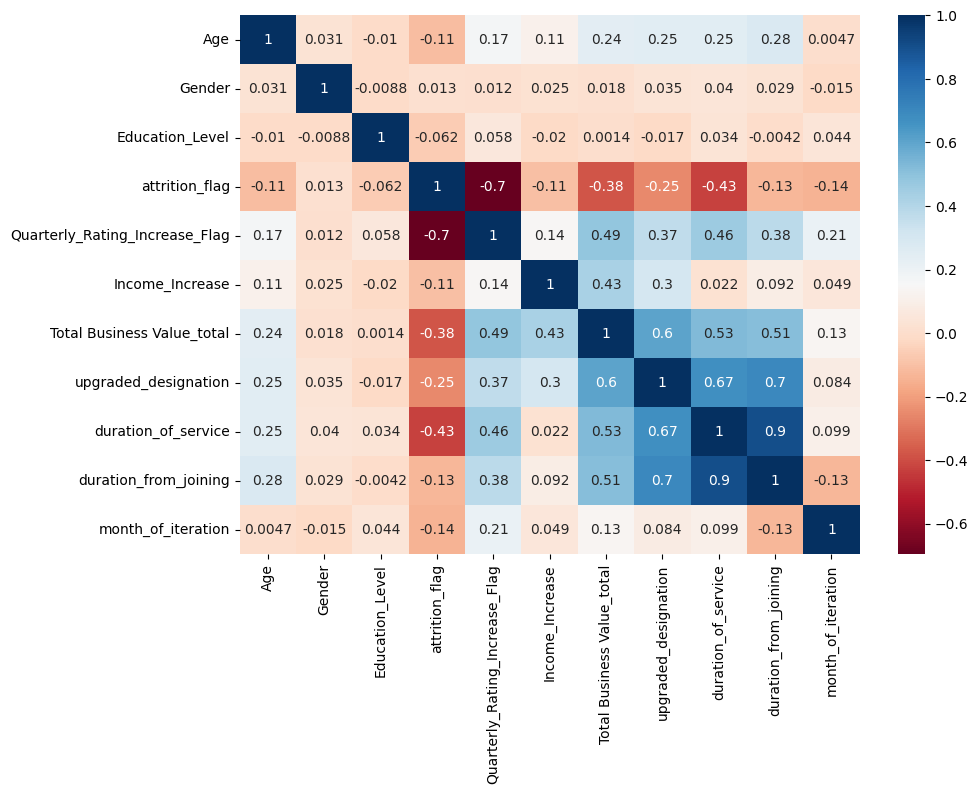

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(result2.select_dtypes(exclude='object').corr(), annot=True,cmap='RdBu')
plt.show()

In [ ]:
result2.isnull().sum()

,0
Age,0
Gender,0
City,0
Education_Level,0
attrition_flag,0
Quarterly_Rating_Increase_Flag,0
Income_Increase,0
Total Business Value_total,0
upgraded_designation,0
duration_of_service,765


In [ ]:
result2['duration_of_service'].fillna(result2['duration_of_service'].mean(),inplace=True)
result2['duration_from_joining'].fillna(result2['duration_from_joining'].mean(),inplace=True)


<ipython-input-48-2c02312f1188>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result2['duration_of_service'].fillna(result2['duration_of_service'].mean(),inplace=True)
<ipython-input-48-2c02312f1188>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [ ]:
result2['month_of_iteration'].fillna(result2['month_of_iteration'].mean(),inplace=True)


<ipython-input-49-2c931049e608>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result2['month_of_iteration'].fillna(result2['month_of_iteration'].mean(),inplace=True)


**ONE-HOT ENCODING FOR CATEGORICAL VARIABLE**

In [ ]:
# Apply one-hot encoding
df_onehot = pd.get_dummies(result2['City'], prefix='City')

# Join with original dataframe
result4 = pd.concat([result2, df_onehot], axis=1)

print(result2)

       Age  Gender City  Education_Level  attrition_flag  \
0     28.0     0.0  C23                2               1   
1     31.0     0.0   C7                2               0   
2     43.0     0.0  C13                2               1   
3     29.0     0.0   C9                0               1   
4     31.0     1.0  C11                1               0   
...    ...     ...  ...              ...             ...   
2376  34.0     0.0  C24                0               0   
2377  34.0     1.0   C9                0               1   
2378  45.0     0.0  C19                0               0   
2379  28.0     1.0  C20                2               0   
2380  30.0     0.0  C27                2               0   

      Quarterly_Rating_Increase_Flag  Income_Increase  \
0                                  0                0   
1                                  0                0   
2                                  0                0   
3                                  0               

In [ ]:
result4.drop(['City'],axis=1,inplace=True)

**STANDARDIZATION AND SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

for col in result4.columns:
  if col not in ['attrition_flag']:
    scaler = StandardScaler()
    result4[col] = scaler.fit_transform(result4[[col]])


In [ ]:
X = result4.drop('attrition_flag', axis = 1)
y = result4['attrition_flag']

result4['attrition_flag'].value_counts()

,count
attrition_flag,
0,1310
1,1071


**MODEL IMPLEMENTATION**

**BAGGING CLASSIFIER**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the base estimator (a simple Decision Tree classifier in this case)
estimator = DecisionTreeClassifier()

# Initialize BaggingClassifier with advanced parameters
bagging = BaggingClassifier(
    estimator=estimator,   # Model to be bagged
    n_estimators=50,                 # Number of models in the ensemble
    max_samples=0.8,                 # Use 80% of the training data to train each model
    max_features=1.0,                # Use all features (can reduce this for feature subsampling)
    bootstrap=True,                  # Bootstrap samples (with replacement)
    bootstrap_features=False,        # Do not bootstrap features
    oob_score=True,                  # Use out-of-bag samples for validation
    n_jobs=-1,                       # Use all CPU cores
    random_state=42                  # Set random seed for reproducibility
)

# Train the Bagging model
bagging.fit(X_train, y_train)

# Make predictions on test data
y_pred = bagging.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Bagging Model Accuracy: {accuracy:.4f}')
precision_score = precision_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
# Out-of-bag score (only valid if oob_score=True)
print(f'OOB Score: {bagging.oob_score_:.4f}')
print(f'Precision Score: {precision_score:.4f}')
print(f'Recall Score: {recall_score:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {confusion_matrix}')


Bagging Model Accuracy: 0.9720
OOB Score: 0.9550
Precision Score: 1.0000
Recall Score: 0.9387
F1 Score: 0.9684
Confusion Matrix: [[389   0]
 [ 20 306]]


As the dataset is small, we need to cross validation and check the performance metrics

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the base estimator (a simple Decision Tree classifier in this case)
estimator = DecisionTreeClassifier()

# Initialize BaggingClassifier with advanced parameters
bagging = BaggingClassifier(
    estimator=estimator,             # Model to be bagged
    n_estimators=50,                 # Number of models in the ensemble
    max_samples=0.8,                 # Use 80% of the training data to train each model
    max_features=1.0,                # Use all features
    bootstrap=True,                   # Bootstrap samples (with replacement)
    bootstrap_features=False,         # Do not bootstrap features
    oob_score=True,                  # Use out-of-bag samples for validation
    n_jobs=-1,                       # Use all CPU cores
    random_state=42                  # Set random seed for reproducibility
)

# Fit the BaggingClassifier on the training set
bagging.fit(X_train, y_train)

# Use cross_val_predict to get predictions on the training set using 5-fold cross-validation
y_train_pred = cross_val_predict(bagging, X_train, y_train, cv=5)

# Evaluate on the training set (using cross-validated predictions)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

print(f'Precision on Training Set: {train_precision:.4f}')
print(f'Recall on Training Set: {train_recall:.4f}')
print(f'F1 Score on Training Set: {train_f1:.4f}')
print(f'Confusion Matrix on Training Set: \n{train_conf_matrix}')

# Now, get predictions on the test set (X_test)
y_test_pred = bagging.predict(X_test)

# Calculate the scores for the test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print(f'Precision on Test Set: {test_precision:.4f}')
print(f'Recall on Test Set: {test_recall:.4f}')
print(f'F1 Score on Test Set: {test_f1:.4f}')
print(f'Confusion Matrix on Test Set: \n{test_conf_matrix}')

# Out-of-bag score (only valid if oob_score=True)
print(f'OOB Score: {bagging.oob_score_:.4f}')


Precision on Training Set: 0.9801
Recall on Training Set: 0.9235
F1 Score on Training Set: 0.9509
Confusion Matrix on Training Set: 
[[907  14]
 [ 57 688]]
Precision on Test Set: 1.0000
Recall on Test Set: 0.9387
F1 Score on Test Set: 0.9684
Confusion Matrix on Test Set: 
[[389   0]
 [ 20 306]]
OOB Score: 0.9550


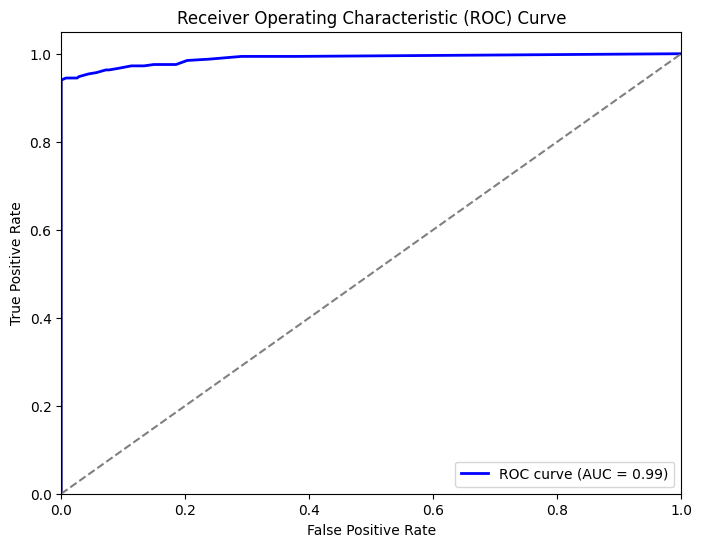

In [ ]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


# Step 3: Predict probabilities for the positive class
y_pred_proba = bagging.predict_proba(X_test)[:, 1]  # Get probability for the positive class (class 1)

# Step 4: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Summary from the above model:**
In this problem at hand, minimising FN or having higher recall is more important, so we need to increase the recall further, FP are not harmful

Overall the model performance is good with and without cross validation, in both cases, we have 95.5% oob score which is good

**BOOSTING MODEL IMPLEMENTATION - GDBT,XGB AND LGBM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

# TODO: Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=10)

# TODO: Train Gradient Boosting Classifier on original data
gbc_orig = GradientBoostingClassifier(random_state=10)

gbc_orig.fit(X_train_orig,y_train_orig)
pred_orig = gbc_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig,pred_orig)
precision_orig = precision_score(y_test_orig,pred_orig)
recall_orig = recall_score(y_test_orig,pred_orig)
f1_orig = f1_score(y_test_orig,pred_orig)
confusion_matrix = confusion_matrix(y_test_orig,pred_orig)


# Compare accuracies
print(f"Accuracy on original data: {accuracy_orig}")
print(f"Precision on original data: {precision_orig}")
print(f"Recall on original data: {recall_orig}")
print(f"F1 Score on original data: {f1_orig}")
print(f"Confusion Matrix on original data: {confusion_matrix}")


Accuracy on original data: 0.9580712788259959
Precision on original data: 0.9783783783783784
Recall on original data: 0.9187817258883249
F1 Score on original data: 0.9476439790575916
Confusion Matrix on original data: [[276   4]
 [ 16 181]]


In [ ]:
X.

In [ ]:
import joblib
import os

save_directory = "F:/ola_attrition_project/"
os.makedirs(save_directory, exist_ok=True)  # Ensure directory exists

save_path = os.path.join(save_directory, "ola_attrition_rate.pkl")
print(save_path)
joblib.dump(gbc_orig, save_path)
print(f"Model saved successfully at: {save_path}")

F:/ola_attrition_project/ola_attrition_rate.pkl
Model saved successfully at: F:/ola_attrition_project/ola_attrition_rate.pkl


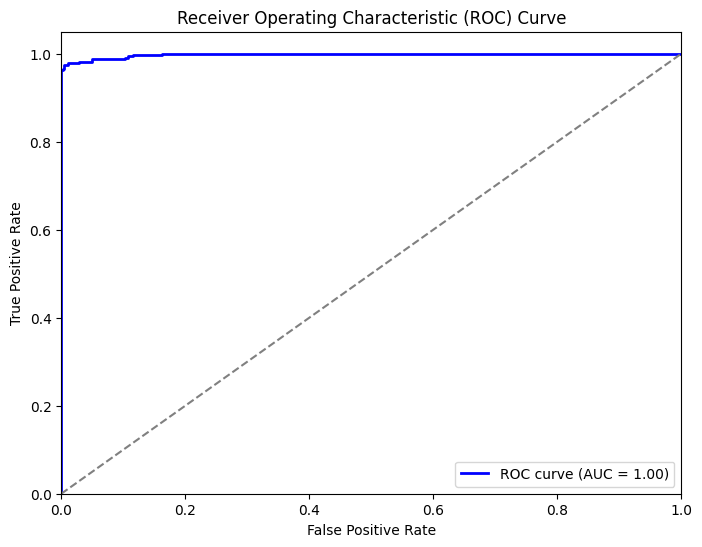

In [ ]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


# Step 3: Predict probabilities for the positive class
y_pred_proba = gbc_orig.predict_proba(X_test)[:, 1]  # Get probability for the positive class (class 1)

# Step 4: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The most important feature is: duration_of_service


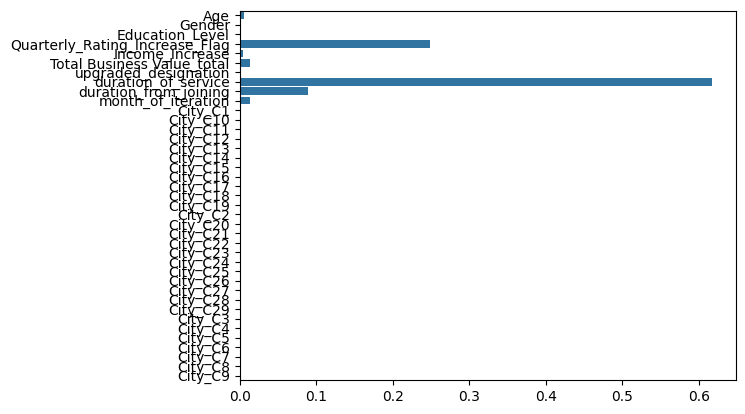

In [ ]:

feature_importances = gbc_orig.feature_importances_


features = np.array(X.columns)

# TODO: Identifying the most important feature
most_important_feature = features[np.argmax(feature_importances)]

print(f"The most important feature is: {most_important_feature}")

sns.barplot(y= features, x=feature_importances)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define the model
gbdt = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'GBDT Accuracy with GridSearchCV: {accuracy:.4f}')


Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 0.9669056499516507
GBDT Accuracy with GridSearchCV: 0.9560


TypeError: 'numpy.float64' object is not callable

In [ ]:
precision_orig = precision_score(y_test,y_pred)
recall_orig = recall_score(y_test,y_pred)
f1_orig = f1_score(y_test,y_pred)
confusion_report = confusion_matrix(y_test,y_pred)
print(f'GBDT Precision with GridSearchCV: {precision_orig:.4f}')
print(f'GBDT Precision with GridSearchCV: {recall_orig:.4f}')
print(f'GBDT Precision with GridSearchCV: {f1_orig:.4f}')


In [ ]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import GridSearchCV,train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100],          # Number of trees in the ensemble
    'max_depth': [3, 4, 5],               # Maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1], # Step size at each iteration
    'subsample': [0.7, 1.0],            # Fraction of samples used for training
    'colsample_bytree': [0.7,1.0],     # Fraction of features used for training
    'gamma': [0, 0.1, 0.3, 0.5],             # Minimum loss reduction required to make a split
    'reg_alpha': [0, 0.1, 1],                # L1 regularization (alpha)
    'reg_lambda': [0.5, 1.0, 1.5],           # L2 regularization (lambda)
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # You can use other metrics like 'f1', 'roc_auc', etc.
    cv=5,                # 5-fold cross-validation
    verbose=1,           # Show progress during the grid search
    n_jobs=-1            # Use all available cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the best estimator on the entire training data
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


precision_score = precision_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
confusion_metrics = confusion_matrix(y_test,y_pred)

print(f"Precision Score: {precision_score}")
print(f"Recall Score: {recall_score}")
print(f"F1 Score: {f1_score}")
print(f"Confusion Matrix: {confusion_metrics}")


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 0.5, 'subsample': 1.0}
Test Accuracy: 0.9623
Precision Score: 1.0
Recall Score: 0.9086294416243654
F1 Score: 0.9521276595744681
Confusion Matrix: [[280   0]
 [ 18 179]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:02:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

# Initialize LightGBM classifier with advanced parameters
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,             # Number of boosting iterations
    learning_rate=0.1,            # Learning rate
    max_depth=3,                  # Maximum depth of each tree
    num_leaves=31,                # Number of leaves per tree
    subsample=0.8,                # Subsample ratio for each tree
    colsample_bytree=0.8,         # Subsample ratio of columns per tree
    reg_alpha=0.1,                # L1 regularization
    reg_lambda=1,                 # L2 regularization
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# confusion_grid = confusion_matrix(y_test, y_pred)

print(f'LightGBM Accuracy: {accuracy:.4f}')
# print(f'LightGBM Precision: {precision:.4f}')
# print(f'LightGBM Recall: {recall:.4f}')
# print(f'LightGBM F1 Score: {f1:.4f}')
# print(f'LightGBM Confusion Matrix: {confusion_grid}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 874, number of negative: 1030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459034 -> initscore=-0.164234
[LightGBM] [Info] Start training from score -0.164234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

precision_score_lightgbm = precision_score(y_test,y_pred)
recall_score_lightgbm = recall_score(y_test,y_pred)
f1_score_lightgbm = f1_score(y_test,y_pred)
print(f'LightGBM Precision: {precision_score_lightgbm:.4f}')
print(f'LightGBM Recall: {recall_score_lightgbm:.4f}')
print(f'LightGBM F1 Score: {f1_score_lightgbm:.4f}')

LightGBM Precision: 0.9944
LightGBM Recall: 0.9036
LightGBM F1 Score: 0.9468


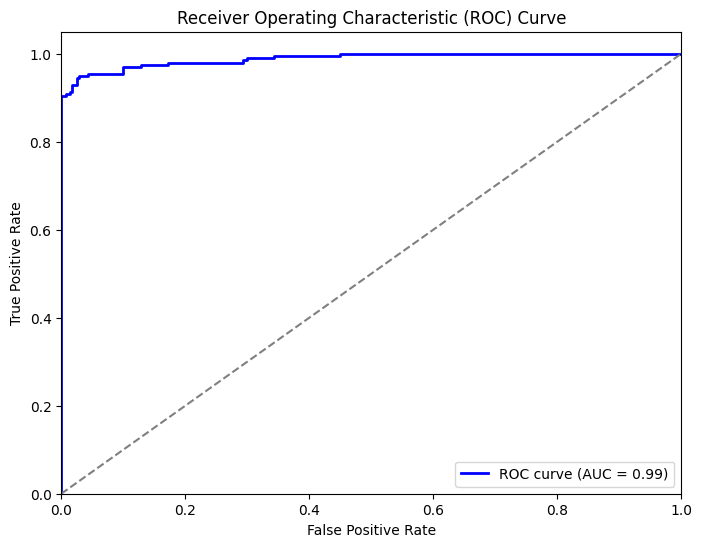

In [ ]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb  # Ensure xgboost is installed
import numpy as np

# Step 2: Assuming you have trained an XGBoost model and have the test set
# Let's assume the following:
# X_test = your test features
# y_test = your true labels for the test set
# model = your trained XGBoost model

# Step 3: Predict probabilities for the positive class
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Get probability for the positive class (class 1)

# Step 4: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb  # Ensure xgboost is installed
import numpy as np

# Step 2: Assuming you have trained an XGBoost model and have the test set
# Let's assume the following:
# X_test = your test features
# y_test = your true labels for the test set
# model = your trained XGBoost model

# Step 3: Predict probabilities for the positive class
y_train_proba = lgb_model.predict_proba(X_train)[:, 1]  # Get probability for the positive class (class 1)

# Step 4: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train,y_train_proba)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'lgb_model' is not defined